In [860]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

In [861]:
pattern_PbTe_10_10 = os.path.join('3-PbTe-thinfilm', 'PbTe', '10-10', '*.dat')
dat_files_list_PbTe_10_10 = glob.glob(pattern_PbTe_10_10, recursive=True)

pattern_substrato_10_10 = os.path.join('3-PbTe-thinfilm', 'substrato', '10-10', '*.dat')
dat_files_list_substrato_10_10 = glob.glob(pattern_substrato_10_10, recursive=True)

In [862]:
dict_with_all_dfs_PbTe_10_10 = {}
for path in dat_files_list_PbTe_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_PbTe_10_10[df_name] = [df, temperature]

In [863]:
dict_with_all_dfs_substrato_10_10 = {}
for path in dat_files_list_substrato_10_10:
    df = pd.read_csv(path, sep="	")
    fname_split = path.split('\\')[3].split('__')
    temperature = int(fname_split[6][:-1])
    df_name = fname_split[0] + '_' + fname_split[6]
    dict_with_all_dfs_substrato_10_10[df_name] = [df, temperature]

In [864]:
temperatures = []
dict_with_mean_dfs_PbTe_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_PbTe_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_PbTe_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_PbTe_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [865]:
temperatures = []
dict_with_mean_dfs_substrato_10_10 = {}
id = 0
for key, df_list in dict_with_all_dfs_substrato_10_10.items():
    if df_list[1] in temperatures:
        continue
    else:
        temperatures.append(df_list[1])
        df_temperature_list = [df_list[0] for key, df_list in dict_with_all_dfs_substrato_10_10.items() if df_list[1] == temperatures[id]]
        mean_df = pd.concat(df_temperature_list).groupby('pos')['X'].mean().reset_index()
        dict_with_mean_dfs_substrato_10_10[str(temperatures[id])+'K'] = [mean_df, temperatures[id]]
        id+=1

In [866]:
c = 3e8 # meter per second
N = len(dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'])
d_film = 0.0016e-3
n_sample = 2.56
print(f"c = {c:.1e} m/s \nN = {N} \nfilm thickness = {d_film*1e6:1.1f} um \nn_sample = {n_sample}")

c = 3.0e+08 m/s 
N = 601 
film thickness = 1.6 um 
n_sample = 2.56


In [867]:
# Making all df's have the same length

N_len_diff = dict_with_mean_dfs_substrato_10_10['300K'][0].shape[0] - dict_with_mean_dfs_PbTe_10_10['300K'][0].shape[0]
# print(N_len_diff)
for df in dict_with_mean_dfs_substrato_10_10.values():
    df[0] = df[0][(N_len_diff):].reset_index(drop=True)

In [868]:
print(dict_with_mean_dfs_substrato_10_10['300K'][0])

        pos             X
0    57.000 -2.273745e-13
1    57.005  1.136880e-13
2    57.010 -2.273755e-13
3    57.015 -6.821250e-13
4    57.020  2.273755e-13
..      ...           ...
596  59.980  1.932690e-12
597  59.985  1.136875e-13
598  59.990 -4.547495e-13
599  59.995 -1.705315e-12
600  60.000 -2.046370e-12

[601 rows x 2 columns]


In [869]:
# id_max_X = dict_with_mean_dfs_substrato_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_substrato_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][0])*2e-3/c

In [870]:
# id_max_X = dict_with_mean_dfs_PbTe_10_10['300K'][0]['X'].idxmax()
for df in dict_with_mean_dfs_PbTe_10_10.values():
    df[0]['time_moment'] = (df[0]['pos']-df[0]['pos'][0])*2e-3/c

In [871]:
print(dict_with_mean_dfs_substrato_10_10['300K'][0].shape)

(601, 3)


In [872]:
time_step = dict_with_mean_dfs_substrato_10_10['300K'][0]['time_moment'][1] - dict_with_mean_dfs_substrato_10_10['300K'][0]['time_moment'][0]
print(f"c = {c:.1e} m/s \nN = {N} \nfilm thickness = {d_film*1e6:1.1f} um \ntime step = {time_step*1e12:1.3f} ps")

c = 3.0e+08 m/s 
N = 601 
film thickness = 1.6 um 
time step = 0.033 ps


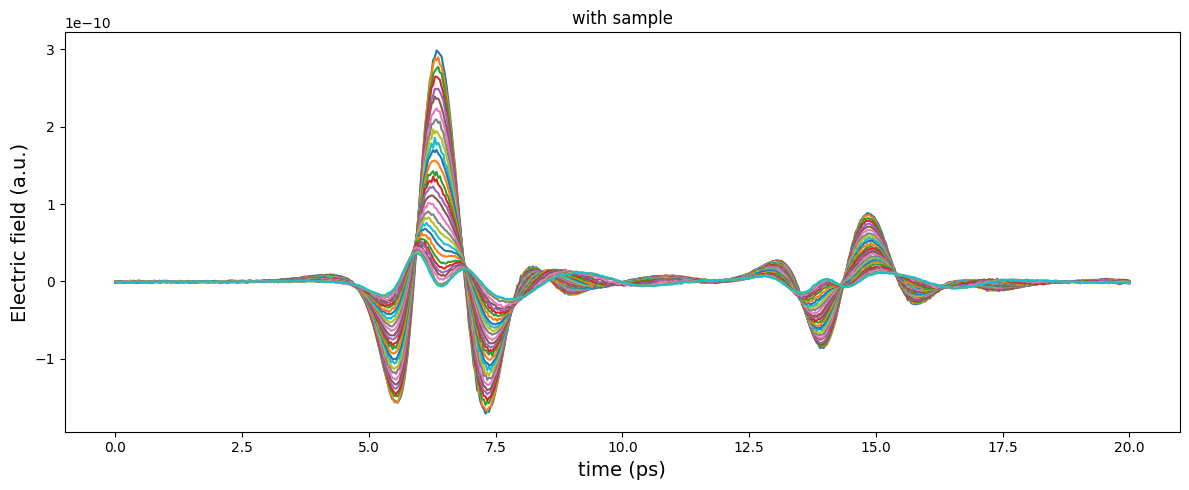

In [873]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_PbTe_10_10.items():
    # if df[1]<200:
    #     continue
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_title('with sample')
ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()

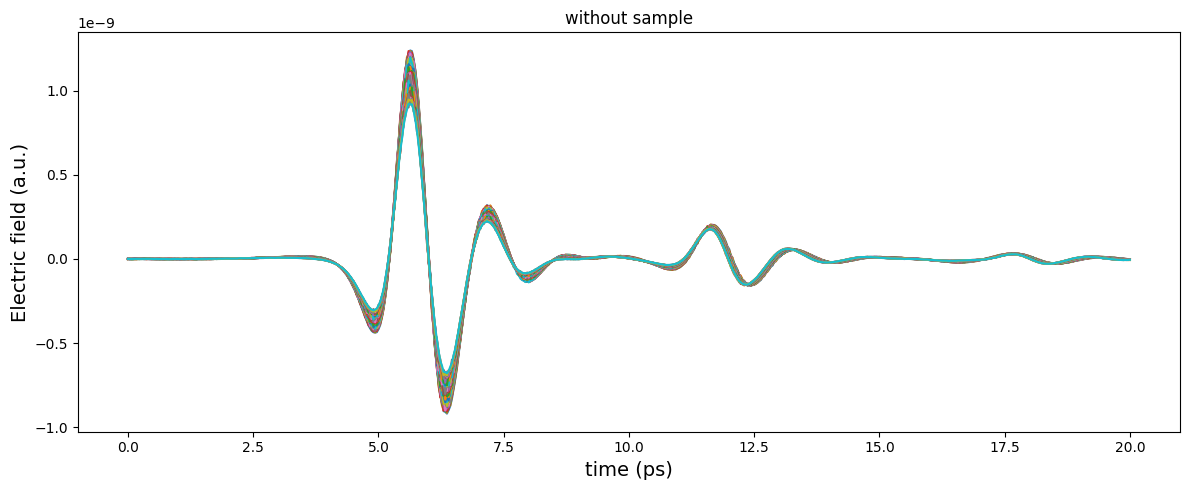

In [874]:
fig, ax = plt.subplots(figsize=(12, 5), tight_layout=True)
for df_name, df in dict_with_mean_dfs_substrato_10_10.items():
    ax.plot(df[0]['time_moment']*1e12, df[0]['X'])

ax.set_title('without sample')
ax.set_xlabel('time (ps)', fontsize=14)
ax.set_ylabel('Electric field (a.u.)',fontsize=14)

plt.show()

# Windowing

Windowing is a technique to mitigate artifacts produced by multiple reflections and limited time window. The simplest window is a rectangular one, which consists in just truncate the data before the reflections' pulses. When you truncate the data points you lost spectral resolution, since you're reducing the time window. To recover (and even enhance) the spectral resolution we can just add zeros after the truncation point, this technique is called **zero padding**. This truncation sometimes is sufficient to retrieve frequencies values, but it lacks of information about the spectral amplitude (see section 3.2 in this [paper](https://link.springer.com/article/10.1007/s10762-025-01092-2)), that's where other windows play a role. In this notebook I'll test some functions as windows (e.g. gaussian window), and how to implement in the code and data analysis.

In [1014]:
def _gaussian_window(x, x_0, sigma, A):
    return A * np.exp(-(x - x_0)**2 / (2 * sigma**2))

def apply_window(df_ref, df_sample, t_ref_refl, t_sample_refl, function, params, N_win):
    """
    This function receives both reference and sample signal data, and apply a window function following the steps
    described by the paper found in doi.org/10.1007/s10762-025-01092-2 

    Args:
        df_ref: Dataframe of the reference pulse
        df_sample: Dataframe of the sample pulse
        params: Window function parameters
        t_ref_refl: Time in picoseconds for the start of pulse reflection for reference data
        t_sample_refl: Time in picoseconds for the start of pulse reflection for sample data
        N_win: Length of window function
        function: Window function to apply to all dataframes: Gaussian or flattop
    """
    #copy to not change original dataframes
    ref_df = df_ref.copy()
    sample_df = df_sample.copy()

    # Calculate time step and dataframe lengths
    t_ref_refl = t_ref_refl*1e-12
    t_sample_refl = t_sample_refl*1e-12
    time_step = ref_df['time_moment'][1]-ref_df['time_moment'][0]
    N_ref = ref_df.shape[0]
    N_sample = sample_df.shape[0]

    # If dataframes lengths are different, use zero padding to make N_sample = N_ref
    if N_ref > N_sample:
        delta_N = N_ref - N_sample
        tf = sample_df['time_moment'][N_sample-1]
        zero_padding_length_mismatch = pd.DataFrame({'pos': np.zeros(delta_N), 'X': np.zeros(delta_N), 'time_moment': np.zeros(delta_N)})
        sample_df = pd.concat([zero_padding_length_mismatch, sample_df], ignore_index=True)
        N_sample = N_sample + delta_N
        sample_df['time_moment'] = np.linspace(0, time_step * (N_sample-1), N_sample)
    elif N_sample > N_ref:
        delta_N = N_sample - N_ref
        tf = ref_df['time_moment'][N_ref-1]
        zero_padding_length_mismatch = pd.DataFrame({'pos': np.zeros(delta_N), 'X': np.zeros(delta_N), 'time_moment': np.zeros(delta_N)})
        ref_df = pd.concat([zero_padding_length_mismatch, ref_df], ignore_index=True)
        N_ref = N_ref + delta_N
        ref_df['time_moment'] = np.linspace(0, time_step * (N_ref-1), N_ref)

    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(sample_df.shape)
    #     print(ref_df)

    # Determine time moment for main pulse and reflection peaks
    t_peak_sample_id = sample_df['X'].idxmax()
    t_peak_ref_id = ref_df['X'].idxmax()
    t_peak_ref = ref_df['time_moment'][t_peak_ref_id]
    t_peak_sample = sample_df['time_moment'][t_peak_sample_id]

    # t_find_reflection_id = round(dt_find_reflection/time_step)
    # t_peak_reflection_sample_id = sample_df['X'][(t_peak_sample_id+t_find_reflection_id):].idxmax()
    # t_peak_reflection_ref_id = ref_df['X'][(t_peak_ref_id+t_find_reflection_id):].idxmax()
    # t_peak_reflection_ref = ref_df['time_moment'][t_peak_reflection_ref_id]
    # t_peak_reflection_sample = sample_df['time_moment'][t_peak_reflection_sample_id]
    # print(f'{t_find_reflection_id}')
    # print(f't ref reflection = {t_peak_reflection_ref*1e12:1.1f} \nt sample reflection = {t_peak_reflection_sample*1e12:1.1f}')

    # Amplitude normalizations factors
    peak_max_ref = ref_df['X'][t_peak_ref_id]
    peak_max_sample = sample_df['X'][t_peak_sample_id]

    # Plotting peaks before alignment
    fig, ax = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax.plot(ref_df['time_moment']*1e12, ref_df['X']/peak_max_ref+3, 'r')
    ax.plot(sample_df['time_moment']*1e12, sample_df['X']/peak_max_sample, 'b')
    ax.annotate(
    r'$t_{ref}^{refl}$',
    xy=(t_ref_refl*1e12, 3.05),
    xytext=(t_ref_refl*1e12, 3.7),
    fontsize=12,
    arrowprops=dict(
        facecolor='red',
        width=2,
        shrink=0.05,
        headwidth=4,
        headlength=6
    )
    )
    ax.annotate(
    r'$t_{sam}^{refl}$',
    xy=(t_sample_refl*1e12, 0.1),
    xytext=(t_sample_refl*1e12, 0.8),
    fontsize=12,
    arrowprops=dict(
        facecolor='blue',
        width=2,
        shrink=0.05,
        headwidth=4,
        headlength=6
    )
    )
    ax.set_xlabel('Time (ps)', fontsize=14)
    ax.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax.legend(['reference', 'sample'], fontsize = 10)
    ax.set_title(r'$t_{ref}^{max}$'+ f'= {t_peak_ref*1e12:1.2f} ps' + '   '+ r'$t_{sam}^{max}$' + f'= {t_peak_sample*1e12: 1.2f} ps'+ '   '+ r'$t_{ref}^{refl}$' + f'= {t_ref_refl*1e12: 1.2f} ps'+ '   '+ r'$t_{sam}^{refl}$' + f'= {t_sample_refl*1e12: 1.2f} ps', fontsize=14)
    ax.set_xticks(np.arange(0, 21, 1))
    ax.set_ylim((-1, 4.25))

    # Plotting inset
    t_ref_refl_id = round(t_ref_refl/time_step)
    t_sample_refl_id = round(t_sample_refl/time_step)
    axins = ax.inset_axes([0.67, 0.43, 0.3, 0.25])
    axins.plot(ref_df['time_moment'][(t_ref_refl_id-30):t_ref_refl_id+1]*1e12 - t_ref_refl*1e12, ref_df['X'][(t_ref_refl_id-30):t_ref_refl_id+1] / peak_max_ref, 'r')
    axins.plot(sample_df['time_moment'][(t_sample_refl_id-30):t_sample_refl_id+1]*1e12 - t_sample_refl*1e12, sample_df['X'][(t_sample_refl_id-30):t_sample_refl_id+1] / peak_max_sample, 'b')
    axins.set_xlabel(r'$t - t^{ref}$ (ps)')
    axins.set_xlim((-1,0))

    # Aligning peaks
    delta_t_max_id = t_peak_ref_id - t_peak_sample_id
    delta_t_max = t_peak_ref - t_peak_sample

    if delta_t_max > 0:
        N_align = N_sample - delta_t_max_id
        sample_df = sample_df.iloc[:(N_align)]
        sample_df = pd.DataFrame({'pos': np.zeros(N_sample), 'X':pd.concat([pd.Series(0, index=range(delta_t_max_id)), sample_df['X']]), 'time_moment': np.linspace(0, (N_sample-1)*time_step, N_sample)})
    elif delta_t_max < 0:
        N_align = N_sample + delta_t_max_id
        sample_df = sample_df.iloc[-delta_t_max_id:]
        sample_df = pd.DataFrame({'pos': np.zeros(N_sample), 'X':pd.concat([sample_df['X'], pd.Series(0, index=range(-delta_t_max_id))]), 'time_moment': np.linspace(0, (N_sample-1)*time_step, N_sample)})


    # with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #     print(sample_df.shape)
    #     print(sample_df)

    fig2, ax2 = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax2.plot(ref_df['time_moment']*1e12, ref_df['X'] / peak_max_ref, 'r')
    ax2.plot(sample_df['time_moment']*1e12, sample_df['X'] / peak_max_sample, 'b')
    ax2.set_xlabel('Time (ps)', fontsize=14)
    ax2.set_ylabel('Electric Field (a.u.)', fontsize=14)
    ax2.legend(['reference', 'sample'], fontsize = 10)
    ax2.set_xticks(np.arange(0, 21, 1))
    

    # Applying the window function
    if function == 'gaussian':
        params[0] = t_peak_ref
        time_window =  np.arange(-time_step * (N_win//2) + params[0], time_step * (N_win//2 + 1) + params[0], time_step)
        window = _gaussian_window(time_window, *params)
        N_padding_zeros_to_window = len(sample_df[t_peak_sample_id:]) - t_peak_sample_id
        padding_zeros_to_window = pd.DataFrame({'col': np.zeros(N_padding_zeros_to_window), 'X':  np.zeros(N_padding_zeros_to_window), 'time_moment': np.arange(-(N_padding_zeros_to_window)*time_step,0, time_step)})
        sample_df_before_window = pd.concat([padding_zeros_to_window, sample_df], ignore_index = True)
        window = _gaussian_window(sample_df_before_window['time_moment'], *params)
        N_after_padding = len(sample_df_before_window)
        sample_df_after_window = pd.DataFrame({'time_moment': sample_df_before_window['time_moment'], 'X': sample_df_before_window['X'] * _gaussian_window(sample_df_before_window['time_moment'], *params)})
    

    fig3, ax3 = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax3.plot(sample_df_after_window['time_moment'], window, 'k')
    ax3.plot(sample_df_before_window['time_moment'], sample_df_before_window['X'], 'b')
    ax3.set_xlabel('Time (ps)', fontsize=14)
    ax3.set_ylabel('Electric Field (a.u.)', fontsize=14)

    fig4, ax4 = plt.subplots(figsize=(10, 4), tight_layout=True)
    ax4.plot(sample_df_after_window['time_moment'], sample_df_after_window['X'], 'b')
    ax4.set_xlabel('Time (ps)', fontsize=14)
    ax4.set_ylabel('Electric Field (a.u.)', fontsize=14)


In [1015]:
N_padding_zeros_to_window = 11
print(np.arange(-(N_padding_zeros_to_window)*time_step,0, time_step))

[-3.66666667e-13 -3.33333333e-13 -3.00000000e-13 -2.66666667e-13
 -2.33333333e-13 -2.00000000e-13 -1.66666667e-13 -1.33333333e-13
 -1.00000000e-13 -6.66666667e-14 -3.33333333e-14]


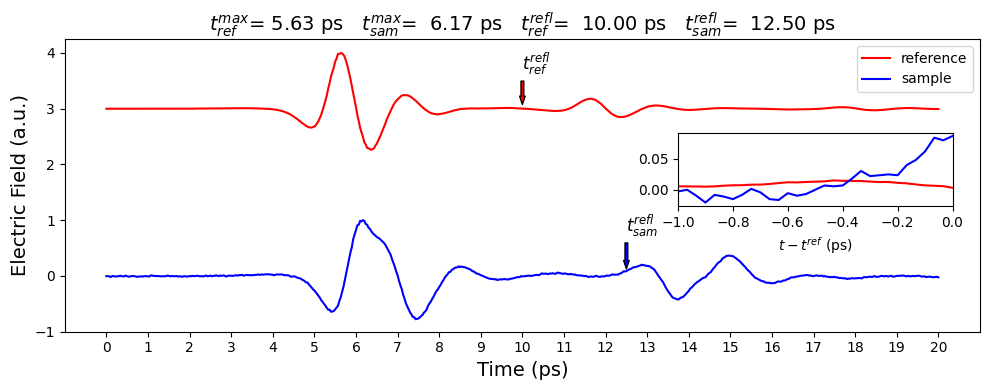

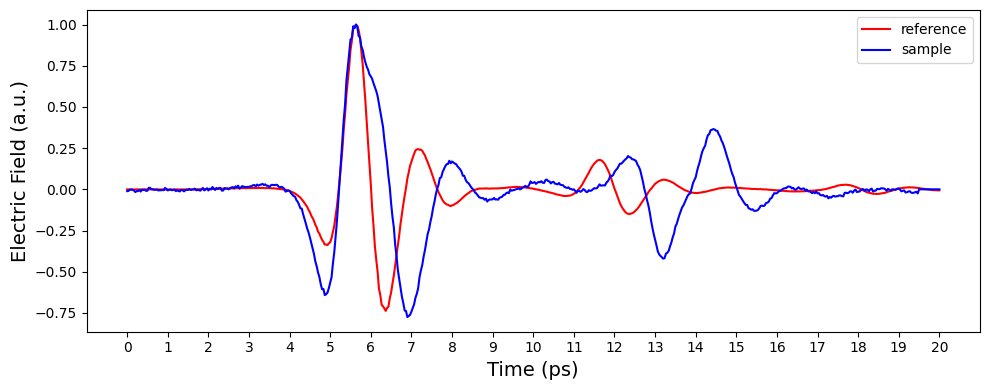

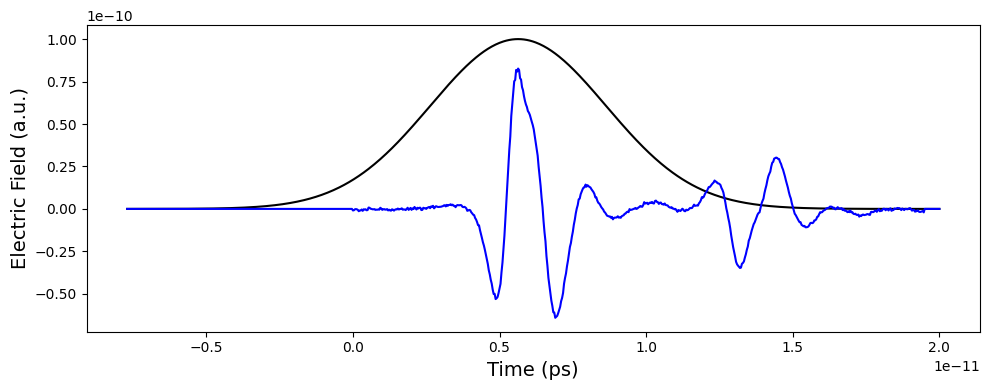

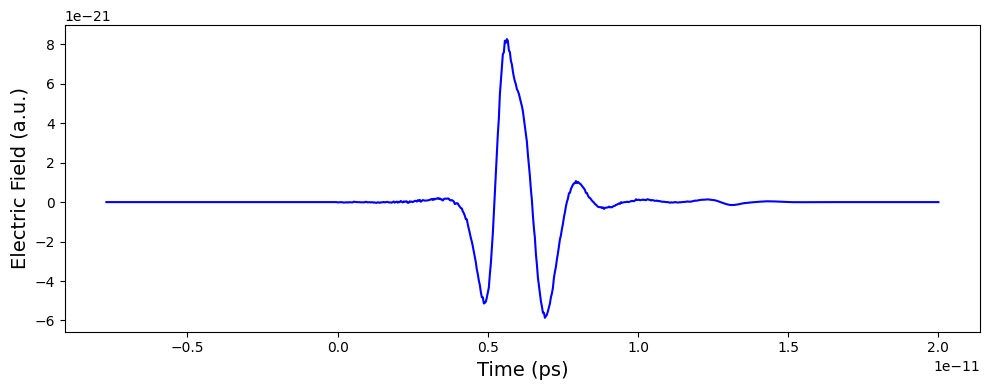

In [1017]:
ref_df = dict_with_mean_dfs_substrato_10_10['120K'][0]
sample_df = dict_with_mean_dfs_PbTe_10_10['120K'][0]
tf = sample_df['time_moment'][600]

# def gaussian_window(x, x_0, sigma, A):
#     return A * np.exp(-(x - x_0)**2 / (2 * sigma**2))
params = [10e-12, 3e-12, 1e-10]

apply_window(ref_df, sample_df, 10, 12.5, 'gaussian', params, 600)